In [5]:
import numpy as np
from ultralytics import YOLO
import cv2
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import random

import torch
from torchvision import transforms
from models.experimental import attempt_load
from utils.general import *

In [6]:
img_path = "test_images/test5.jpg"

In [7]:
model = YOLO("best.pt")
char_model = YOLO("charecter_detection\\try2\\weights\\best.pt")

In [8]:
detections = model(img_path)[0]


image 1/1 e:\My Projects\Number Plate detection\test_images\test5.jpg: 640x480 1 Back Plate, 68.6ms
Speed: 5.4ms preprocess, 68.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


In [9]:
detections_ = []
for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    print(class_id)
    detections_.append([x1, y1, x2, y2, score])

1.0


In [10]:
detections_

[[265.7208557128906,
  309.9900207519531,
  555.02001953125,
  476.7117614746094,
  0.31012919545173645]]

[265.7208557128906, 309.9900207519531, 555.02001953125, 476.7117614746094, 0.31012919545173645]


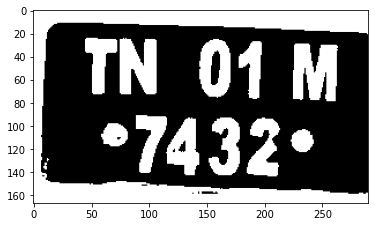

In [11]:

try:
    fls = detections_[0]
    print(fls)
    frame = cv2.imread(img_path)
    crop = frame[int(fls[1]):int(fls[3]), int(fls[0]):int(fls[2])]
    crop_gray=cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    # crop_gray =cv2.bitwise_not(crop_gray)
    ret, crop_gray_thresh = cv2.threshold(crop_gray, 127, 255, cv2.THRESH_BINARY_INV)


    ksize = (1, 1)
  
# Using cv2.blur() method 
    image = cv2.blur(crop_gray, ksize) 


    # reader = easyocr.Reader(['ch_sim','en'])
    plt.imshow(crop_gray_thresh, cmap="gray")
    # result = reader.readtext(image)
    # print(result)
except IndexError:
    print("Unable to Detect")


In [12]:
image2 = cv2.resize(image, (640, 640))
image2.shape

(640, 640)

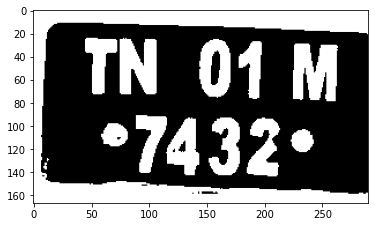

In [13]:
plt.imshow(crop_gray_thresh, cmap="gray")

In [14]:
cv2.imwrite("image.jpg", crop_gray)

True

In [15]:
char_detection = char_model("image.jpg")[0]
char_detections_ = []
for detection in char_detection.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    char_detections_.append([x1, y1, x2, y2, score])
    print(class_id)




image 1/1 e:\My Projects\Number Plate detection\image.jpg: 384x640 12 charecters, 75.5ms
Speed: 0.0ms preprocess, 75.5ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [16]:
# type()
new_char_list = list(char_detections_)

In [17]:
# new_char_list.index()

In [22]:
frame = cv2.imread('image.jpg')
print(f"thres {0.1 * ((frame.shape)[1])}")
for i in char_detections_:    
    fls = i
    

    if (int(fls[3]) - int(fls[1])) < (0.1 * ((frame.shape)[1])) :
        pass
    else:
        cv2.rectangle(frame, (int(fls[0]), int(fls[1])), (int(fls[2]), int(fls[3])),(255,0,0), 1)
        print(int(fls[3]) - int(fls[1]))
        crop = frame[int(fls[1]):int(fls[3]), int(fls[0]):int(fls[2])]
        crop_gray=cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        proper_image = cv2.resize(crop_gray, (40, 40))
        # cv2.imwrite(f"charecters/image{random.random()}.jpg", proper_image)
        

    # adding a little blur 
    ksize = (1, 1)
    image = cv2.blur(crop_gray, ksize) 


thres 29.0
60
62
59
60
61
63
61
62
64
62
62
49


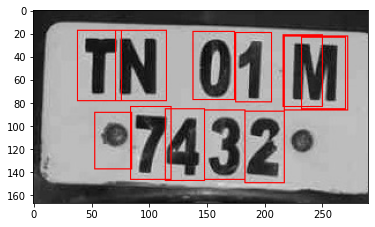

In [23]:
plt.imshow(frame, cmap="gray")


In [24]:
def contains_letters(s):
    return any(char.isalpha() for char in s)

def contains_numbers(s):
    return any(char.isdigit() for char in s)

In [25]:
numbers= []
for i in mylist:
    my_string = i[1]
    last_four_letters = my_string[-4:]
    if contains_numbers(last_four_letters):
        if contains_letters(last_four_letters):
            pass
        else:
            numbers.append(last_four_letters)   

NameError: name 'mylist' is not defined

In [ ]:
numbers

[]

In [ ]:
text_img = frame

cv2.rectangle(text_img, (int(fls[0]), int(fls[1])), (int(fls[2]), int(fls[3])),(255,0,0), 10)
res_img = cv2.putText(text_img, str(numbers[0]) , (int(fls[0]), int(fls[1])), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)


IndexError: list index out of range

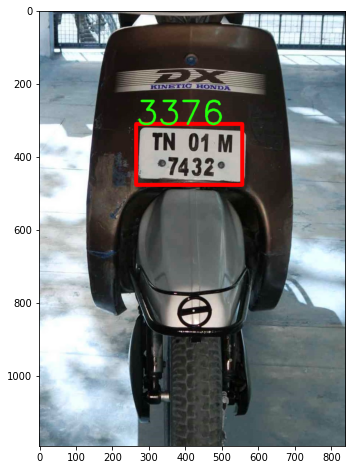

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(res_img)